<a href="https://colab.research.google.com/github/Sanjeevhegde009/Yes-Bank-closing-price-prediction/blob/main/Yes_Bank_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import numpy as np                      #import numpy module
from numpy import math
import pandas as pd                     #import pandas module
import matplotlib.pyplot as plt         #import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from xgboost import XGBRegressor
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error)

In [223]:
from google.colab import drive    #importing google drive

In [224]:
drive.mount('/content/drive')     #mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
data= pd.read_csv('/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv')    #specifying the file to be analysed using path and file name

In [226]:
data.head()     #checking the top 5 rows of the data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [227]:
data.tail()     #checking the last five rows of the data set

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [228]:
data.columns.tolist()    #fetching the list of columns in the data set

['Date', 'Open', 'High', 'Low', 'Close']

# **Column description**
The given data consists of 5 columns. They include:
1. Date: The month against which Open, High, Low and Close prices of Yes Bank stock are plotted.
2. Open: Opening price of the stock on the specified date. In this case, start of the month
3. High: Highest price attained by the Yes Bank stock during the monthly period
4. Low: Lowest price attained by the Yes Bank stock during the monthly period
5. Close: Closing price of the Yes Bank stock at the end of the month



# **Exploratory Data Analysis**

In [229]:
data.info()   #checking the information regarding the given data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


It can be seen that the data set contains 4 numeric values and one object that is the month against which price data is collected. There are a total of 185 entries in the given data set

In [230]:
data.isnull().sum()     #checking for null values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Hence, there are no null values in the data set

In [231]:
data.nunique()    #checking repeated entries of data for same month

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

It can be seen that out of 185 entries for dates, all of them are unique. Hence, the given data set contains unique values only

In [232]:
data.describe()       #obtaining statistical description of the given data and making initial comments

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


From above statistical description of the data set during the period of data collection, we can infer:
1. Highest price recorded by Yes Bank is Rs. 404
2. Lowest price recorded by Yes Bank is Rs. 5.55
3. Mean closing price is Rs. 105 with a standard deviation of Rs. 98.58 indicating violent movements in the stock

In [233]:
data.dtypes       #fetching the data type for each feature

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

It can be noted that Date column is object type data which needs to converted into Date type with format mm-yy

In [234]:
from datetime import datetime       #importing datetime library
ohlc_data= data.copy()              #creating a copy of the original data for performing EDA operations
ohlc_data['Date']= ohlc_data['Date'].apply( lambda x: datetime.strptime(x, '%b-%y'))      #converting string data of date column to datetime format

In [235]:
ohlc_data.info()    #checking for succesful conversion into datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Hence, it can be seen that appropriate data types are now assigned to the features.

Lets now see the distribution of the target variable i.e., the closing price against various other parameters

Text(0, 0.5, 'Closing price on Rs.')

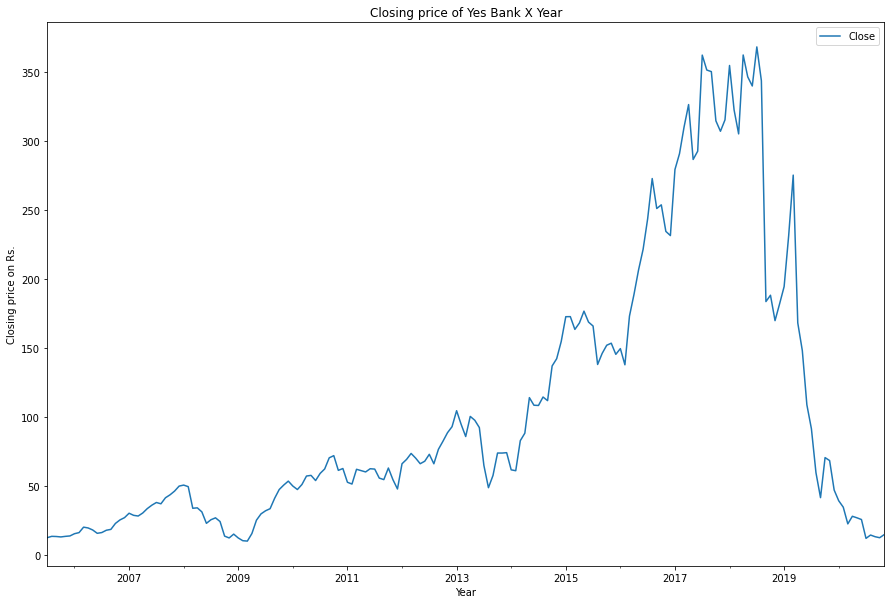

In [236]:
#plotting closing price against date
plt.rcParams['figure.figsize']= (15,10)                               #setting figure size
ohlc_data.plot(kind="line", x="Date", y="Close")                      #plotting linegraph
plt.title("Closing price of Yes Bank X Year")                         #title for the plot
plt.xlabel("Year")                                                    #Xlabel for the plot
plt.ylabel("Closing price on Rs.")                                    #Ylabel for the plot

From the above figure, it is clearly seen that Yes Bank price has been in an uptrend until around mid of 2018. However, after 2018 a massive fall of the stock price is seen due to fraud cases involving the company's then MD and CEO Mr. Rana Kapoor

Text(0.5, 0, 'Closing price in Rs.')

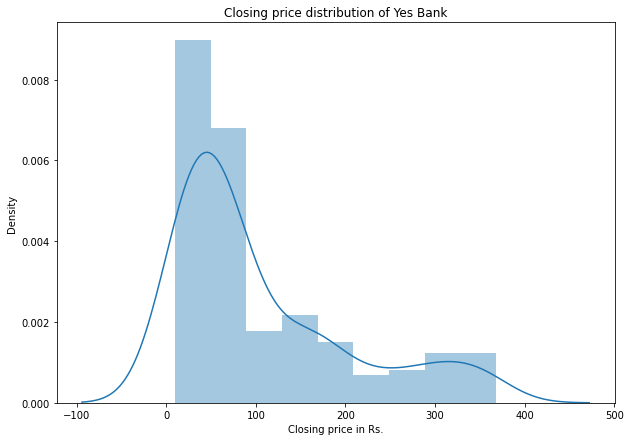

In [237]:
#plotting histogram to check the distribution of the closing price
plt.figure(figsize=(10,7))                                  #setting figure size
sns.distplot(ohlc_data['Close'])                            #plotting histogram with smoothed distribution curve
plt.title("Closing price distribution of Yes Bank")         #title for the plot
plt.xlabel("Closing price in Rs.")                          #xlabel title for the plot

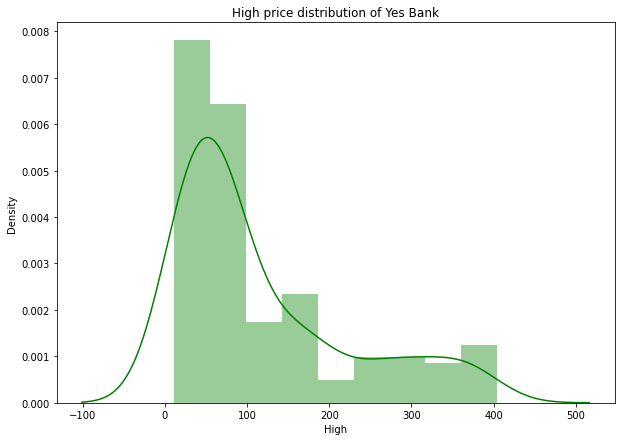

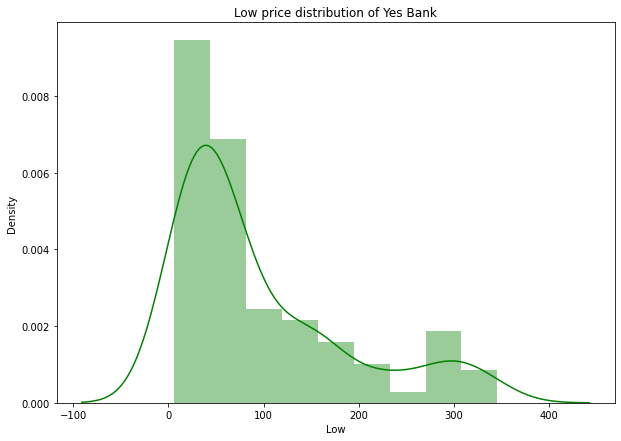

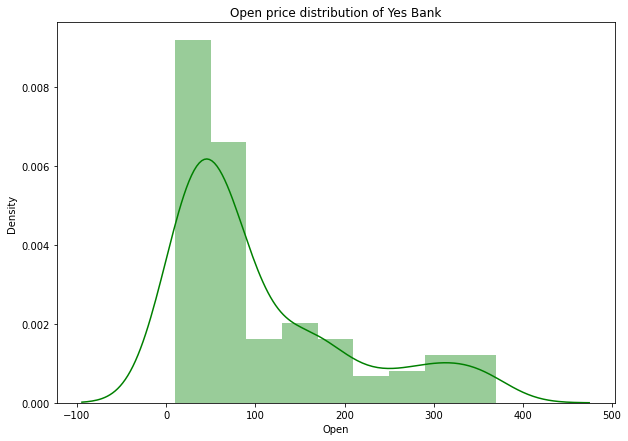

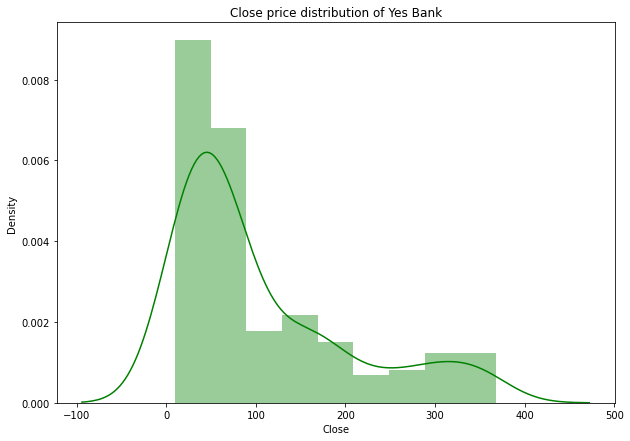

['High', 'Low', 'Open', 'Close']


In [238]:
#checking for skewness by plotting histograms for each feature
numeric_features= list(set(ohlc_data.columns)-{'Date'})            #declaring list of numeric features for plotting graph
for feature in numeric_features:
  fig= plt.figure(figsize=(10,7))
  ax= fig.gca()
  sns.distplot(ohlc_data[feature],kde=True, color="green")
  plt.title(feature+' price distribution of Yes Bank')
plt.show()
print(numeric_features)

Hence, it can be seen that the distribution of features is right skewed

In [239]:
numeric_features

['High', 'Low', 'Open', 'Close']

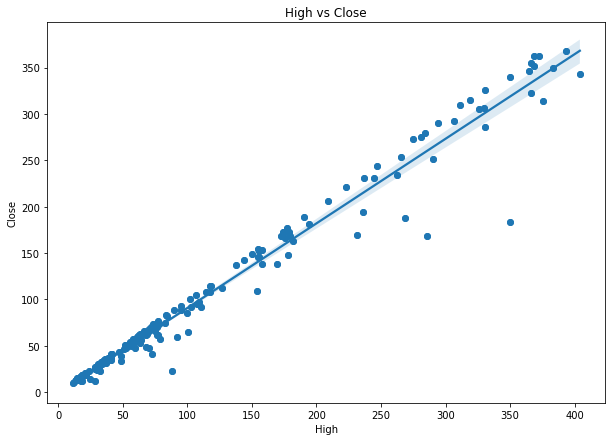

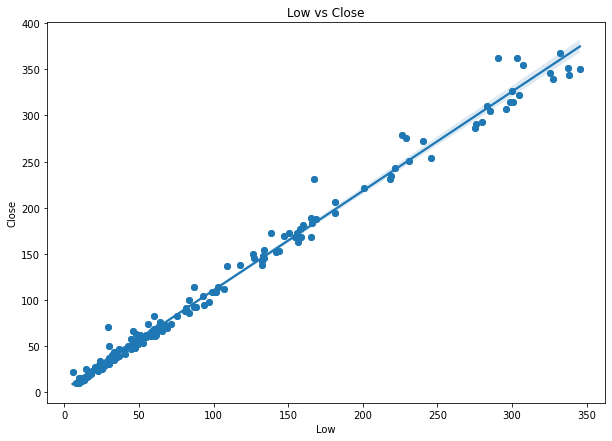

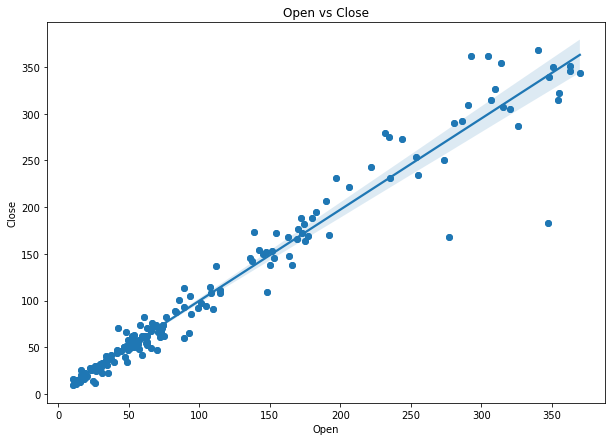

In [240]:
#Checking the relationship between dependent variable i.e., closing price and other independent variables
dependent_features= list(set(numeric_features)-{"Close"})
for feature in dependent_features:
  fig= plt.figure(figsize=(10,7))
  ax=fig.gca()
  plt.scatter(ohlc_data[feature],ohlc_data['Close'])
  plt.title(feature+' vs Close')
  plt.xlabel(feature)
  plt.ylabel('Closing Price')
  sns.regplot(x=feature,y='Close',data=ohlc_data)

Hence, it can be inferred that closing price exhibits linear relationship with the independent features.

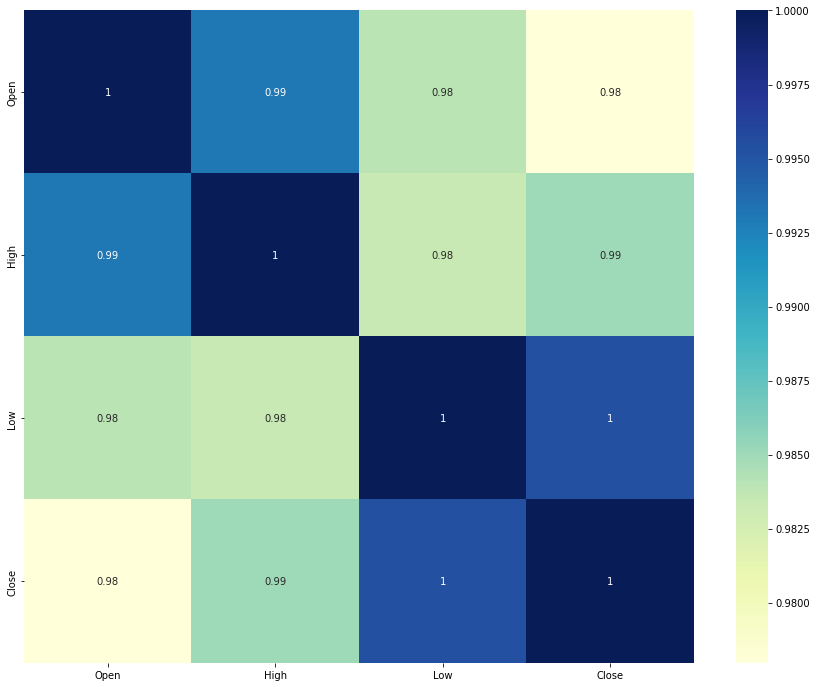

In [241]:
#checking for multicollinearity
plt.figure(figsize=(15,12))
correlation= ohlc_data.corr()
corr= sns.heatmap((correlation), cmap='YlGnBu', annot=True)

**It can be clearly noted that there is a high correlation between all the features.**

Hence, it is necessary to eliminate reduce correlation either by dropping features or establishing another feature which quantifies the variables which are not considered.

# **Feature Engineering**
**We can consider the average value of the features Open, High, Low and Close of the previous day for eliminating potential errors in the model we are building**

In [242]:
#Calculating average of Open, High and Low
ohlc_data['avg_ohlc']= ohlc_data[['Open','High','Low','Close']].mean(axis=1).round(2)

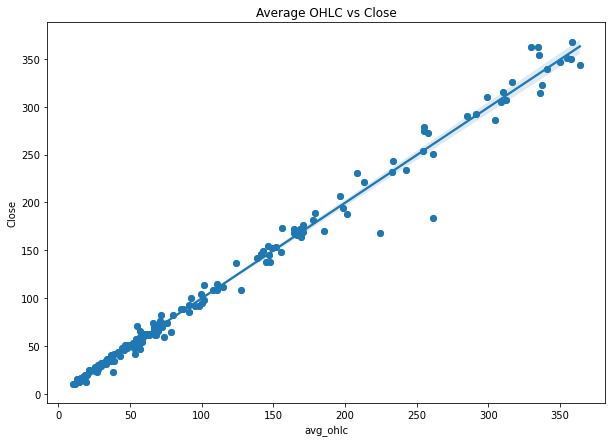

In [243]:
plt.rcParams['figure.figsize']=(10,7)
plt.scatter(x=ohlc_data['avg_ohlc'],y=ohlc_data['Close'])
plt.title("Average OHLC vs Close")
plt.xlabel("Average price of OHL")
plt.ylabel("Closing Price")
sns.regplot(x="avg_ohlc",y="Close", data= ohlc_data)

Hence, it is clear that similar linear relationship exits between the new feature avg_ohlc i.e., average of Open, High, Low and Close of previous day with current session Closing price of the stock

**Also, multicollinearity can be further reduced by considering lag variable of avg_ohlc. By convention, stock markets are analysed with indicators whose lookback period spans to 14 previous data points such as 14-day Exponential Moving Average and 14 period Relative Strength Index(RSI) etc. Hence, 14 data points based lag can be ideally incorporated into the data set wherein, a weighted measure of the average of OHLC for 14 consecutive session can be considered while forming linear regression equation**

In [244]:
#incorporating lags
for i in range(1,15):
  ohlc_data["lag{}".format(i)]= ohlc_data.avg_ohlc.shift(i)

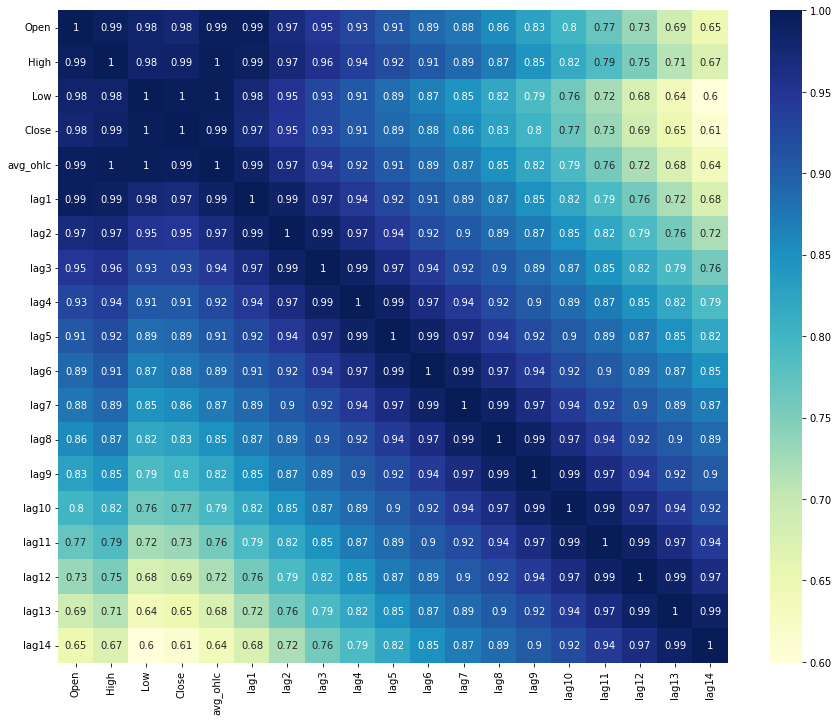

In [245]:
#checking for multicollinearity
plt.figure(figsize=(15,12))
corr= sns.heatmap(ohlc_data.corr(), cmap='YlGnBu', annot=True)


Thus, it is evident that introducing lag has significantly reduced correlation between variables

In [246]:
#We can now drop other columns in the data frame except avg_ohl feature since it represents all other features
ohlc_data.drop(columns=["Open","High","Low"],axis=1, inplace=True)
ohlc_data.set_index(["Date"],inplace=True)

# Splitting and scaling data for training and testing

In [247]:
y= ohlc_data.dropna().Close    #drops any NaN values in the data frame
x= ohlc_data.dropna().drop(["Close"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.8,random_state=0)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Fitting Regression Curve 

In [250]:
regressor= LinearRegression()    
regressor.fit(X_train, y_train)     #fitting linear regression model

LinearRegression()

In [251]:
regressor.intercept_    #Fetching the intercept value

112.09705882352944

In [252]:
regressor.coef_       #fetching coefficents

array([ 173.30117973, -120.42850064,   80.11097634,  -59.21059173,
         48.44389932,  -43.84659733,   39.71909625,  -28.20136495,
         11.59183541,   -3.59728601,   18.6204153 ,  -29.6475985 ,
         18.29888064,   -7.91168524,    2.30767998])

In [260]:
y_pred_test= regressor.predict(X_test) #predicting value of closing price

In [261]:
r2_score(y_test,y_pred_test) #calculating R2 score for test data set

0.9949951083265787

In [262]:
y_pred_train= regressor.predict(X_train)    #predicting values for trained data set

In [263]:
r2_score(y_pred_train,y_train)    #calculating R2 score for train data set

0.9980674317522331

In [318]:
def plotter(y,y_hat):
  ''' this function takes values of predictions and actual values(time series based with Date and Closing price as features) of two data sets for a given linear regression model of an equity'''
  df=pd.DataFrame(y)                          #Converts data into DataFrame
  df["Predicted Closing"] = list(y_hat)       #Adds Corresponding values of predicted closing price to the dataframe
  df.sort_values(by="Date", inplace=True)     #sorts the data according to the timeseries based on the date
  plt.figure(figsize=(15,12))                 #sets figure size
  plt.plot("Predicted Closing", color='green', data=df)       #plots predicted closing price in green
  plt.plot("Close", color='red', data=df)     #plots actual closing price in red
  plt.xlabel("Date")                          #assigns X label
  plt.ylabel("Price")                         #assigns Y label
  plt.legend("Predicted Closing", "Actual Closing")   #assigns the legend for Actual and predicted curves
  plt.suptitle("Predicted VS Actual Closing price")   #provides the main title for the chart
  plt.grid(True)                              #plots the grid


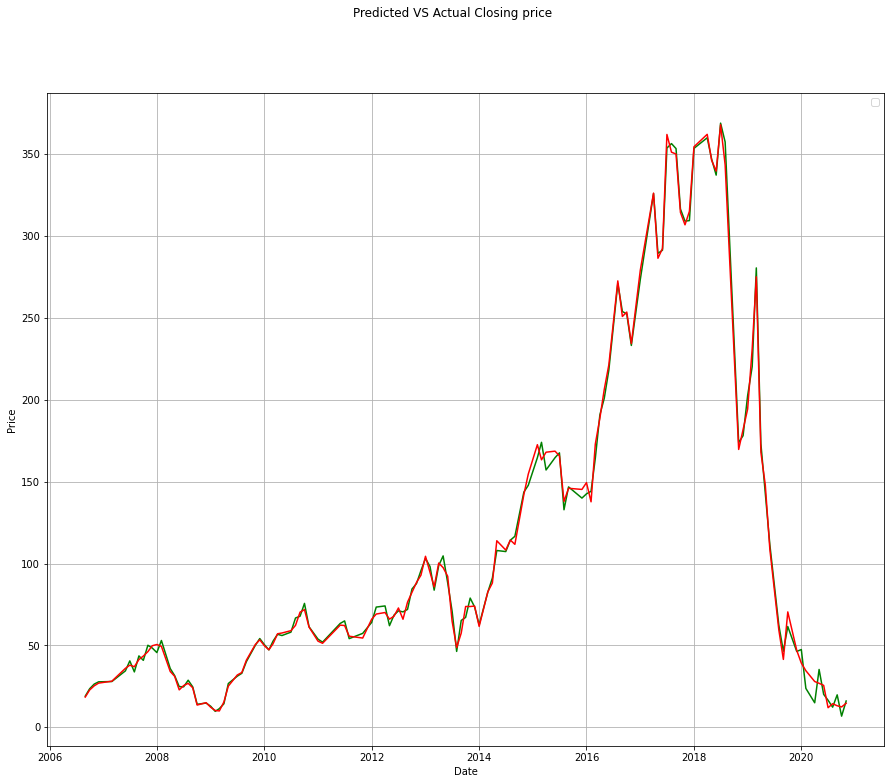

In [319]:
plotter(y=y_train, y_hat= y_pred_train)     #providing the function with data sets